In [1]:
import datascience
print(datascience.__version__)

0.15.2


In [2]:
from datascience import *
import numpy as np
#path_data = '../../../../data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### From Ani: Problems I ran into when trying out left_end= and right_end= ###

In [3]:
# top = Table.read_table(path_data + 'top_movies.csv')

top = Table.read_table('top_movies.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [4]:
millions = top.select(0).with_column('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


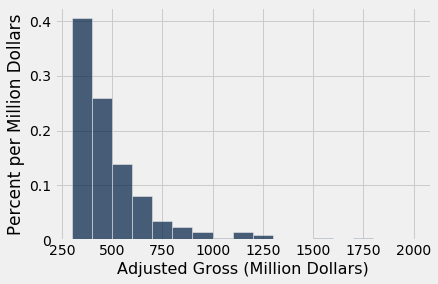

In [5]:
bin_ends = np.arange(300, 2001, 100)
millions.hist('Adjusted Gross', bins=bin_ends, unit="Million Dollars")

360
[ 360  400  500  600  700  800  900 1000]


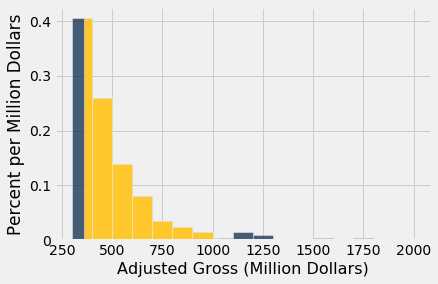

In [6]:
""" Works as expected the first time.
But run the cell again (without running anything else in between),
and some of the bins change."""
millions.hist('Adjusted Gross', bins=bin_ends, unit='Million Dollars', 
              left_end = 360, right_end = 1020)

300
[300 400 500]


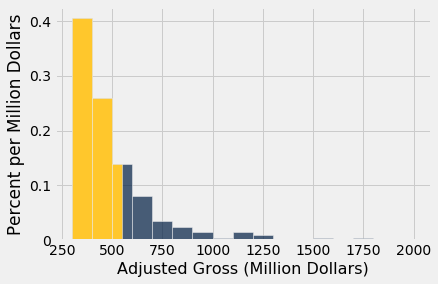

In [7]:
"""If you run this after running the one above,
it doesn't work."""

millions.hist('Adjusted Gross', bins=bin_ends, unit='Million Dollars', 
              right_end = 550)

300
[300 400 500]


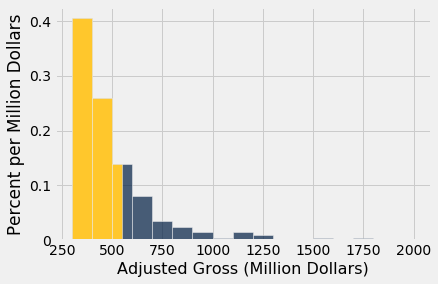

In [8]:
"""If you run it without running any left_end right_end code above it,
it has a problem at the left edge."""

millions.hist('Adjusted Gross', bins=bin_ends, unit='Million Dollars', 
              right_end = 550)

550
[ 550  600  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900]


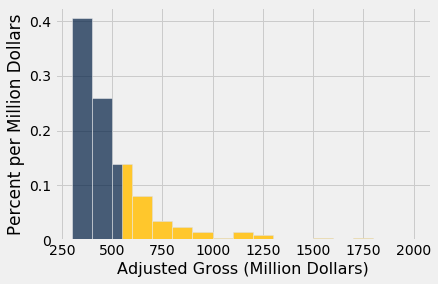

In [9]:
"""Same problem: works the first time, but not upon rerunning
or when following a prior use of left_end or right_end.
Bins change at the edge."""

millions.hist('Adjusted Gross', bins=bin_ends, unit='Million Dollars', 
              left_end = 550)

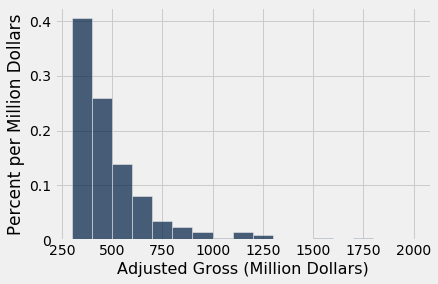

In [10]:
millions.hist('Adjusted Gross', bins=bin_ends, unit='Million Dollars')

In [11]:
bin_ends

array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
       1400, 1500, 1600, 1700, 1800, 1900, 2000])